In [1]:
import sys
import pandas as pd
import os
sys.path.append(os.path.abspath("../0_UTILITY_FUNCTIONS/"))
from get_data import *
from plotting import *
from get_LrLx_data import *

# Get Data

In [2]:
source_df, obs_df, radio_df, xray_df = read_data("../DATA/H1743-322.txt")

H1743-322
Added 5% systematic uncertainty to the radio data.
X-ray uncertainty percentage:  68
Added 10.0% systematic uncertainty to the X-ray data.


In [3]:
obs_df

,name,xray_CI,xray_obs_ref,radio_obs_ref,extra_xray_text,extra_radio_text
0,H1743-322,68,[Williams et al. 2020 & https://ui.adsabs.harv...,[Williams et al. 2020 & https://ui.adsabs.harv...,NaN,NaN


In [4]:
radio_df.head()

,name,blockID,band,t_radio,dt_radio,Rphase,Rstate,Fr,Fr_unc,local_rms,alpha,alpha_unc,Fr_uplim_bool
0,H1743-322,1536166854,L,58366.734,0.031944,rise,HS,0.69,0.078040,45,-0.32,0.03,False
1,H1743-322,1536426351,L,58369.728,0.010417,rise,HS,1.40,0.122066,95,-1.00,0.40,False
2,H1743-322,1536942657,L,58375.705,0.010417,peak/trough,HS,2.42,0.135059,65,-0.40,0.20,False
3,H1743-322,1537545949,L,58382.685,0.010417,decay,HS,1.69,0.098185,34,0.03,0.07,False
4,H1743-322,1538154030,L,58389.716,0.010417,decay,HS,0.88,0.066603,36,-0.10,0.20,False


In [5]:
xray_df.head(4)

,name,obsID,t_xray,dt_xray,Xphase,Xstate,Fx,Fx_unc_l,Fx_unc_u,model,fit_stat,Fx_uplim_bool
0,H1743-322,10247026,58376.44420,0.018051,peak/trough,HS,1.520000e-09,1.717673e-10,1.717673e-10,tbabs*cflux*(powerlaw+gauss),NaN,False
1,H1743-322,10247027,58382.55454,0.018167,decay,HS,1.310000e-09,1.485295e-10,1.485295e-10,tbabs*cflux*(powerlaw+gauss),NaN,False
2,H1743-322,10247029,58388.26959,0.017243,decay,HS,7.900000e-10,8.854942e-11,8.854942e-11,tbabs*cflux*(powerlaw+gauss),NaN,False
3,H1743-322,10247032,58397.63114,0.004970,decay,HS,1.870000e-10,2.075307e-11,2.075307e-11,tbabs*cflux*(powerlaw+gauss),NaN,False


# Light Curves

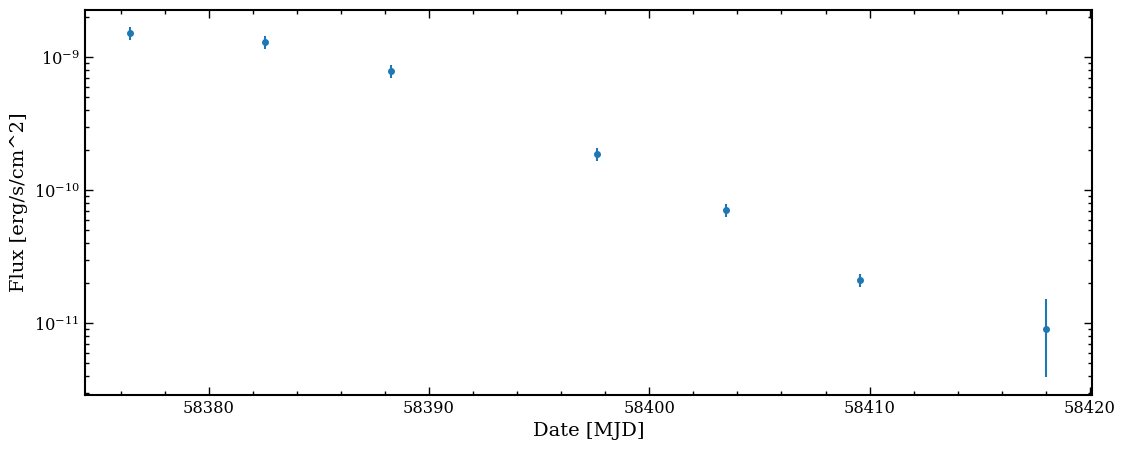

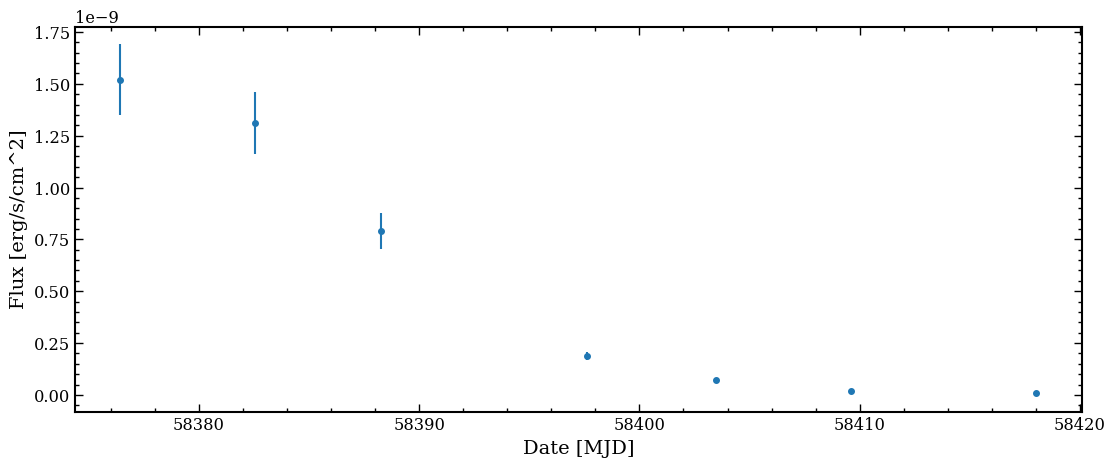

In [6]:
# WITH systematic errors
plot_xray_lightcurve(xray_df)

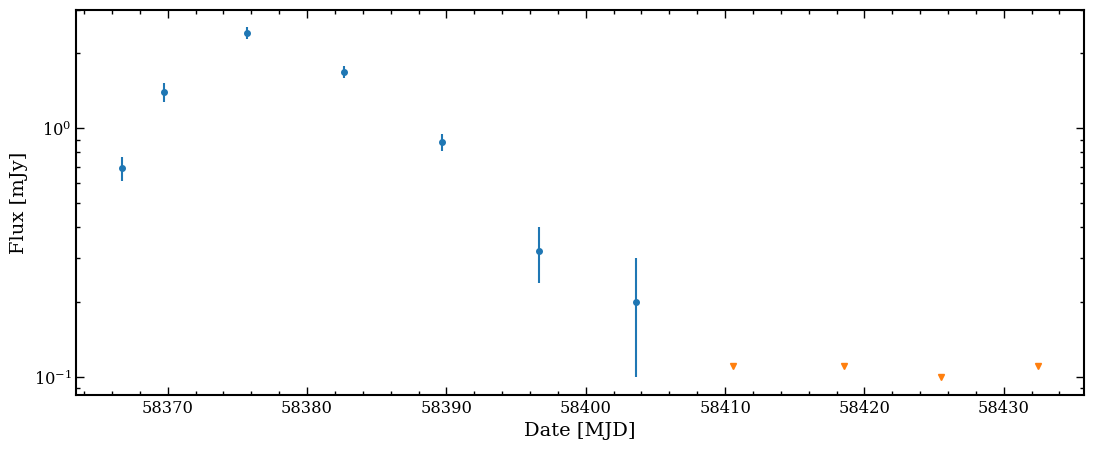

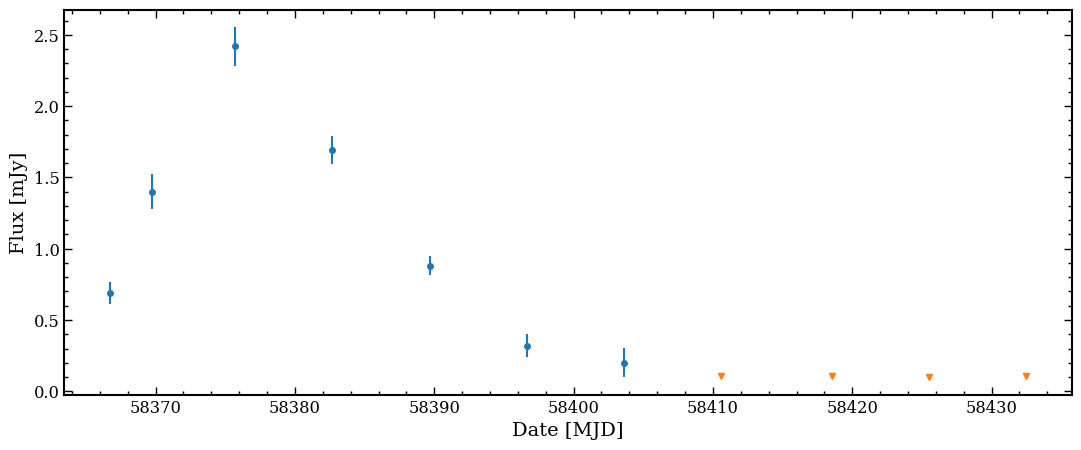

In [7]:
# WITH systematic error
plot_radio_lightcurve(radio_df)

# Pairing
We have fewer points than in the original paper because we do not include MAXI data. Also, note that two of the observations in the paper are slightly more than one day apart. In addition, the paper does not plot the error bars. Besides that, the results look the same.

In [9]:
# For checking against paper
# Use 5GHz with dt = 1.5 days 
paired_data = make_paired_Lr_Lx_df(radio_df, xray_df, source_df, nu_GHz = 5, dt_days=1.5, save=False)

t_radio             Fr [mJy]            Fr_unc [mJy]        #xray     Mean Fx [erg/cm^2/s]          Fx_unc_l[erg/cm^2/s]          Fx_unc_u[erg/cm^2/s]          Fr_uplim_bool  Fx_uplim_bool  state          
58375.705000000     2.42000             0.13506             1         1.52000e-09                   1.71767e-10                   1.71767e-10                   False          False          HS             
58382.685000000     1.69000             0.09818             1         1.31000e-09                   1.48529e-10                   1.48529e-10                   False          False          HS             
58389.716000000     0.88000             0.06660             1         7.90000e-10                   8.85494e-11                   8.85494e-11                   False          False          HS             
58396.662000000     0.32000             0.08158             1         1.87000e-10                   2.07531e-11                   2.07531e-11                   False          F

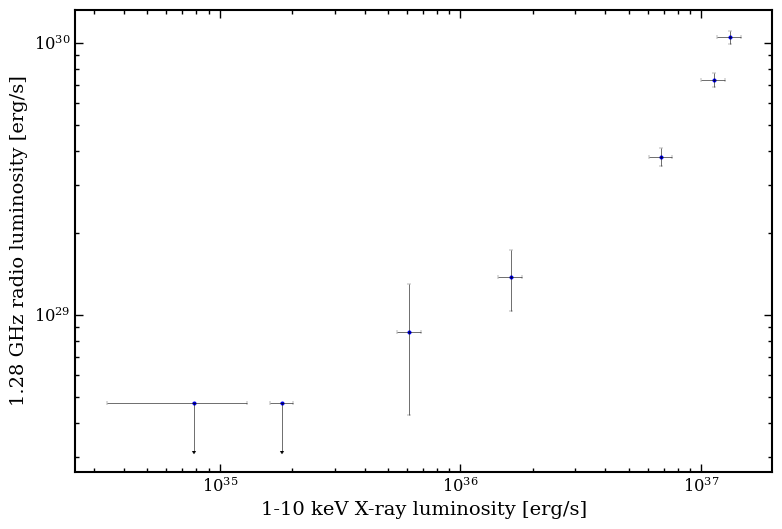

In [10]:
plot_Lr_Lx(paired_data)

In [11]:
# Now at 1.28 GHz with dt = 1 day
paired_data = make_paired_Lr_Lx_df(radio_df, xray_df, source_df)

t_radio             Fr [mJy]            Fr_unc [mJy]        #xray     Mean Fx [erg/cm^2/s]          Fx_unc_l[erg/cm^2/s]          Fx_unc_u[erg/cm^2/s]          Fr_uplim_bool  Fx_uplim_bool  state          
58375.705000000     2.42000             0.13506             1         1.52000e-09                   1.71767e-10                   1.71767e-10                   False          False          HS             
58382.685000000     1.69000             0.09818             1         1.31000e-09                   1.48529e-10                   1.48529e-10                   False          False          HS             
58396.662000000     0.32000             0.08158             1         1.87000e-10                   2.07531e-11                   2.07531e-11                   False          False          HS             
58403.633000000     0.20000             0.10050             1         7.10000e-11                   8.14923e-12                   8.14923e-12                   False          F

In [12]:
lr_all, lx_all, all_types = get_bahramian_data()

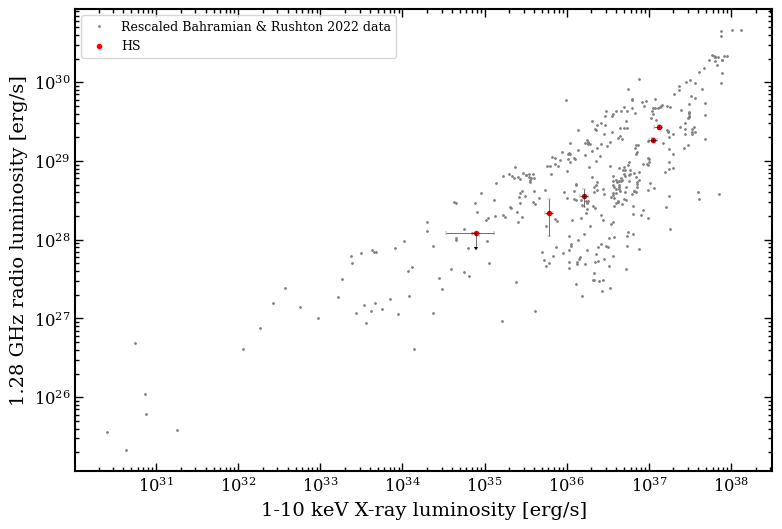

In [13]:
plot_Lr_Lx(paired_data, colourby="state", lx=lx_all, lr=lr_all)

# Interpolation

dt1, dt2:  3.0 10.0

Number of plotting points:  82
Rejected based on distance: radio_MJD = 58366.734; time_to_nearest: 9.71020000000135; time_to_furthest: 58366.734
Rejected based on distance: radio_MJD = 58369.728; time_to_nearest: 6.716199999995297; time_to_furthest: 58369.728
58375.705: time_to_nearest: 0.7391999999963446 & time_to_furthest: 58375.705; y_predict_err: 0.05207872663160451
58382.685: time_to_nearest: 0.130460000000312 & time_to_furthest: 5.584590000005846; y_predict_err: 0.05154897344267262
58389.716: time_to_nearest: 1.4464099999968312 & time_to_furthest: 7.915139999997336; y_predict_err: 0.04961957582839638
58396.662: time_to_nearest: 0.9691400000010617 & time_to_furthest: 8.392409999993106; y_predict_err: 0.05163876362783171
58403.633: time_to_nearest: 0.1643100000001141 & time_to_furthest: 5.954879999997502; y_predict_err: 0.05437213289416043
58410.591: time_to_nearest: 1.0031200000012177 & time_to_furthest: 7.427669999997306; y_predict_err: 0.05458016099692742
58

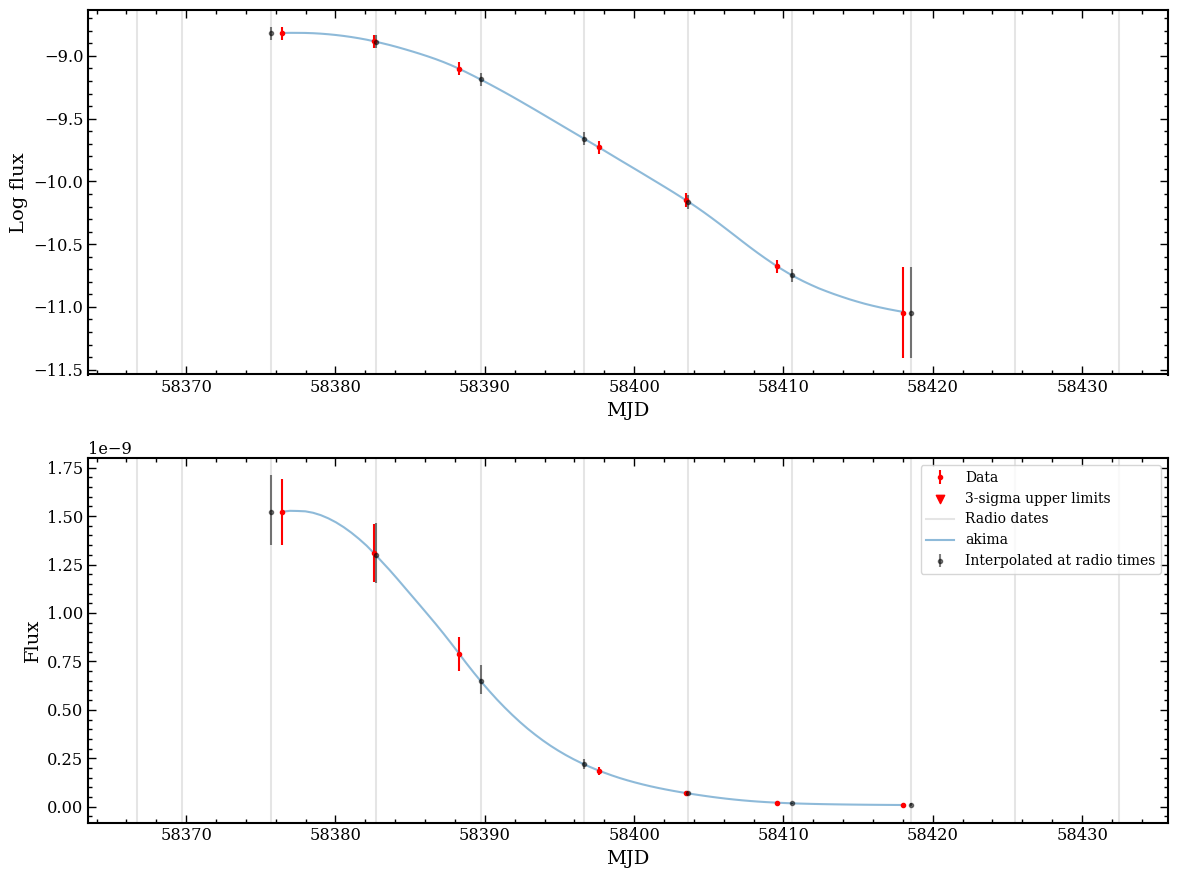

Number of used interpolated data points:  7
Converting to luminosity using d_kpc = 8.5


In [14]:
interpolated_data = make_interpolated_Lr_Lx_df(radio_df, xray_df, source_df, plotly=True)

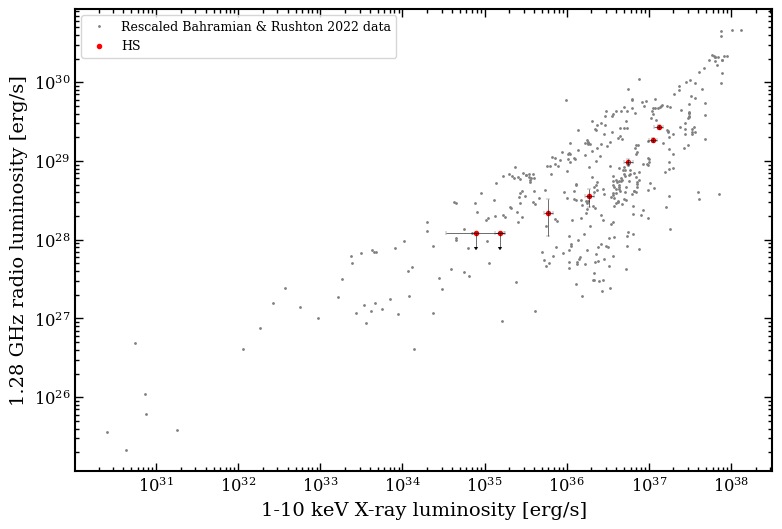

In [15]:
plot_Lr_Lx(interpolated_data, colourby="state", lx=lx_all, lr=lr_all)